In [140]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rcParams['text.usetex'] = True
import illustris_python.groupcat as gc
import pandas as pd

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 22
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 

%matplotlib inline

In [141]:
gal_formation_hires_file = '/Users/forero/Illustris_data/formation_times_TNG300/301/Galaxies/All_Galaxies/ZM_Galaxies3001.dat'

In [ ]:
dtype=[('HaloID', 'i8'),('GalID', 'i8'), ('snapform', 'f8'),('zform', 'f8'),('mass', 'f8'),
       ('x', 'f8'),('y', 'f8'),('z', 'f8')]
gal_formation_hires = np.loadtxt(gal_formation_hires_file, dtype=dtype)


In [ ]:
env_data = pd.read_csv('../data/dataset_stellar_mass_cut_10-10.5.csv')

In [ ]:
env_data['TNGID'] = np.int_(env_data['TNGID'])

In [ ]:
env_data

In [ ]:
ii = np.isin(gal_formation_hires['GalID'], env_data['TNGID'])
print(np.count_nonzero(ii), len(env_data))

In [ ]:
_ = plt.hist(env_data['stellar_mass'], bins=30, alpha=0.3)
_ = plt.hist(np.log10(gal_formation_hires['mass'][ii])+10, bins=30, alpha=0.5)

In [ ]:
gal_formation_hires_sorted = np.sort(gal_formation_hires, order='GalID')
ii = np.isin(gal_formation_hires_sorted['GalID'], env_data['TNGID'])
zform = gal_formation_hires_sorted['zform'][ii]
galid = gal_formation_hires_sorted['GalID'][ii]

In [ ]:
ii_sorted_zform = np.argsort(zform)
n_q = len(zform)//4

In [134]:
galid_late = galid[ii_sorted_zform[:n_q]]
galid_early = galid[ii_sorted_zform[-n_q:]]
print(len(galid_late), len(galid_early))
ii = np.isin(env_data['TNGID'], galid_late)
dens_late = env_data['density'][ii]
env_late = env_data['Env_original'][ii]

ii = np.isin(env_data['TNGID'], galid_early)
dens_early = env_data['density'][ii]
env_early = env_data['Env_original'][ii]
print(len(dens_late), len(dens_early))

5219 5219
5219 5219


(array([2.400e+03, 0.000e+00, 0.000e+00, 2.475e+03, 0.000e+00, 0.000e+00,
        3.430e+02, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

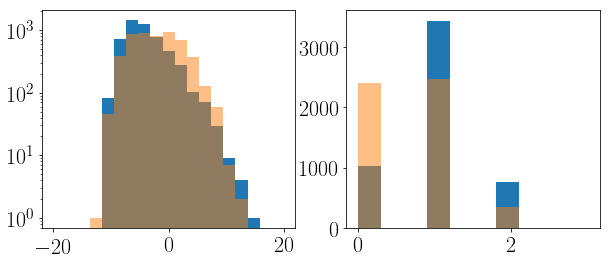

In [136]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

hist_bins = np.linspace(-20,20,20)
out  = plt.hist(dens_late, bins=hist_bins, log=True)
count_late = out[0]
out = plt.hist(dens_early, bins=hist_bins, alpha=0.5, log=True)
count_early = out[0]

plt.subplot(1,2,2)
plt.hist(env_late)
plt.hist(env_early, alpha=0.5)

In [137]:
weights = np.zeros(len(dens_late))
for i in range(len(count_early)):
    ratio = count_early[i]/(count_late[i]+1)
    ii = (dens_late >= hist_bins[i]) & (dens_late<hist_bins[i+1])
    weights[ii] = ratio
    print(ratio, np.count_nonzero(ii))

0.0 0
0.0 0
0.0 0
1.0 0
0.5542168674698795 82
0.5491573033707865 711
0.6116504854368932 1441
0.7114308553157475 1250
1.0496732026143791 764
1.9850107066381157 466
2.501766784452297 282
3.4857142857142858 104
1.7746478873239437 70
2.0 29
0.7 9
0.4 4
0.0 1
0.0 0
0.0 0


(array([2.400e+03, 0.000e+00, 0.000e+00, 2.475e+03, 0.000e+00, 0.000e+00,
        3.430e+02, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

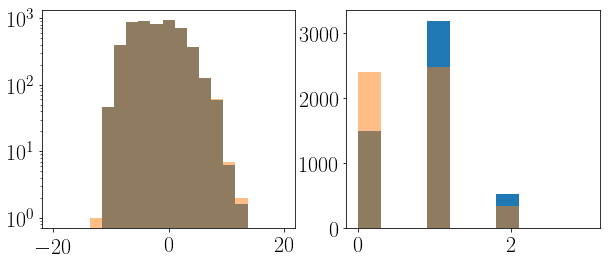

In [139]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

hist_bins = np.linspace(-20,20,20)
out  = plt.hist(dens_late, bins=hist_bins, weights=weights, log=True)
out = plt.hist(dens_early, bins=hist_bins, alpha=0.5, log=True)

plt.subplot(1,2,2)
plt.hist(env_late, weights=weights)
plt.hist(env_early, alpha=0.5)